In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

/Users/andy/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#讀取資料
(X_img_train, y_label_train), \
(X_img_test, y_label_test) = cifar10.load_data()

In [3]:
#查看資料
print('train images:',X_img_train.shape, "labels:",y_label_train.shape)
print('test images:',X_img_test.shape, "labels",y_label_test.shape)

train images: (50000, 32, 32, 3) labels: (50000, 1)
test images: (10000, 32, 32, 3) labels (10000, 1)


In [4]:
#標準化
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
#Onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D

In [7]:
#建立線性堆疊模型
model = Sequential()

In [8]:
#建立卷積層1
model.add(Conv2D(filters=32, #建立32個fliter weight
                kernel_size=(3,3), #每一個filter 3x3大小
                padding='same', #在矩陣邊界外補0
                input_shape=(32,32,3),
                activation='relu'))

In [9]:
model.add(Dropout(0.25))

In [10]:
#建立池化層1，將32x32縮減為16x16
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
#建立卷積層2
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                padding='same',
                activation='relu'))

In [12]:
model.add(Dropout(0.25))

In [13]:
#建立池化層2，將64個16x16縮減為8x8
model.add(MaxPooling2D(pool_size=(2,2)))

建立神經網路

In [14]:
#建立平坦層，降為一維向量64x8x8=4096
model.add(Flatten())

In [15]:
model.add(Dropout(0.25))

In [16]:
#建立隱藏層，1024個神經元
model.add(Dense(1024, activation='relu'))

In [17]:
model.add(Dropout(0.25))

In [18]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [20]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [21]:
#開始訓練
train_history=model.fit(x=X_img_train_normalize,
                       y=y_label_train_OneHot,validation_split=0.2,
                       epochs=10, batch_size=128, verbose=2) #執行10次訓練週期，每一批次128筆資料，所以每一次執行約為40000/128=313筆資料，verbose顯示訓練過程

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 114s - loss: 1.4912 - acc: 0.4613 - val_loss: 1.2786 - val_acc: 0.5744
Epoch 2/10
 - 108s - loss: 1.1384 - acc: 0.5942 - val_loss: 1.1214 - val_acc: 0.6300
Epoch 3/10
 - 109s - loss: 0.9887 - acc: 0.6506 - val_loss: 1.0147 - val_acc: 0.6691
Epoch 4/10
 - 108s - loss: 0.8882 - acc: 0.6855 - val_loss: 0.9949 - val_acc: 0.6793
Epoch 5/10
 - 108s - loss: 0.8020 - acc: 0.7174 - val_loss: 0.8967 - val_acc: 0.7004
Epoch 6/10
 - 109s - loss: 0.7186 - acc: 0.7496 - val_loss: 0.8615 - val_acc: 0.7110
Epoch 7/10
 - 110s - loss: 0.6428 - acc: 0.7742 - val_loss: 0.8311 - val_acc: 0.7272
Epoch 8/10
 - 109s - loss: 0.5789 - acc: 0.7973 - val_loss: 0.7911 - val_acc: 0.7340
Epoch 9/10
 - 109s - loss: 0.5113 - acc: 0.8214 - val_loss: 0.7879 - val_acc: 0.7309
Epoch 10/10
 - 108s - loss: 0.4559 - acc: 0.8409 - val_loss: 0.8139 - val_acc: 0.7179


In [22]:
#以圖表顯示訓練過程
import matplotlib.pylab as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'], loc='upper left') #設定圖例
    plt.show()

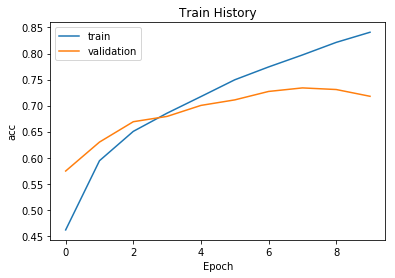

In [23]:
show_train_history(train_history,'acc','val_acc')

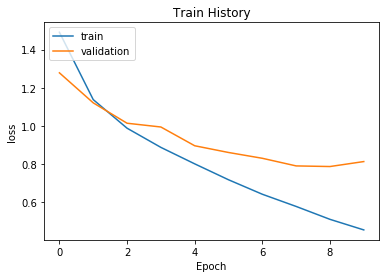

In [24]:
show_train_history(train_history,'loss','val_loss')

In [26]:
#評估模型準確率
scores = model.evaluate(X_img_test_normalize, y_label_test_OneHot)
print("accuracy=",scores[1])

10000/10000 [==============================] - 8s 818us/step

In [27]:
#進行預測
prediction = model.predict_classes(X_img_test_normalize)

In [28]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [33]:
#定義圖形類別名稱
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',
            5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [34]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #傳入參數數字影像、真實值、預測結果、開始顯示資料、資料筆數
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap="binary") #畫出subgraph
        title = str(i) + ',' + label_dict[labels[i][0]] #設定title,顯示標籤
        if len(prediction)>0:
            title+="=>" + label_dict[prediction[i]] #如果有傳入預測結果，title加入預設結果
        ax.set_title(title,fontsize=10) #設定title與大小
        ax.set_xticks([]) #不顯示刻度
        ax.set_yticks([])
        idx += 1 #讀取下一筆
    plt.show()

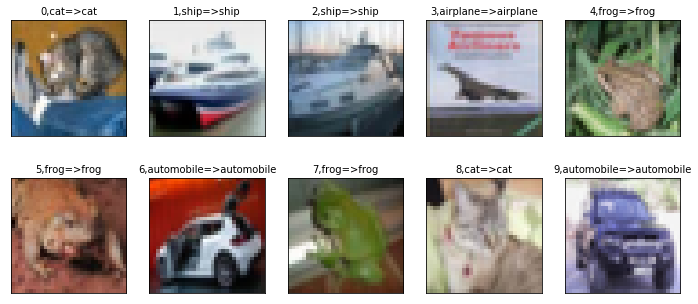

In [36]:
plot_images_labels_prediction(X_img_test,y_label_test,prediction,0,10)